Лабораторная работа 8. 
Построение пайплайна полиномиальной регрессии

In [66]:
# Подключение библиотек

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
# Загрузка данных и разделение на матрицу признаков и зависимую переменную

dataset = pd.read_csv('../MMO/Datasets/social_network_ads_lab8.csv')
dataset.head()

,Age,EstimatedSalary
0,20,23525
1,22,29891
2,29,36642
3,30,40150
4,32,44445


In [67]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[20]
 [22]
 [29]
 [30]
 [32]]
Зависимая переменная
[23525 29891 36642 40150 44445]


In [68]:
# Обучение линейной модели

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [69]:
# Обучение полиномиальной модели

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

[-11945.57920792] [-54446.37026553]


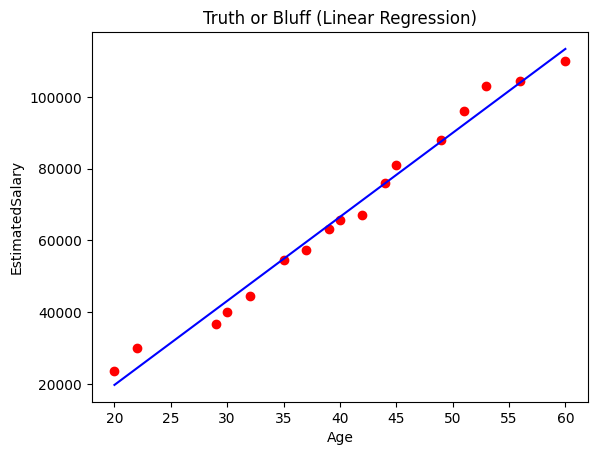

In [70]:
# Предсказание, обработка и визуализация результатов

y_pred_lin = lin_reg.predict([[6.5]])
y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print(y_pred_lin, y_pred_poly)
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

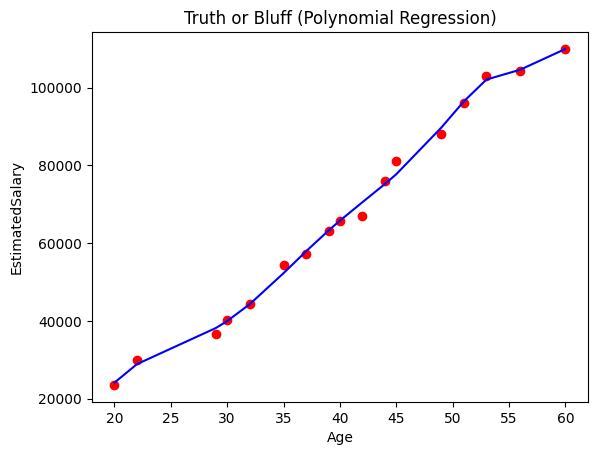

In [71]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()

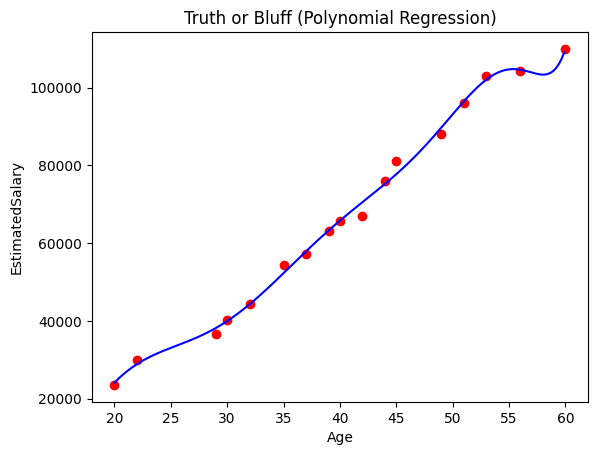

In [72]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.show()